In [2]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [3]:
cat9 = cv2.imread('/home/moe/Documents/ML/CatAndDog/CATS_DOGS/train/CAT/9.jpg')
cat9 = cv2.cvtColor(cat9,cv2.COLOR_BGR2RGB)

In [4]:
type(cat9)

numpy.ndarray

In [5]:
cat9.shape

(426, 320, 3)

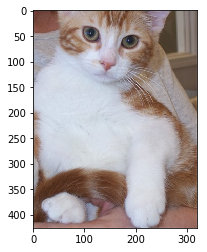

In [6]:
plt.imshow(cat9)

In [7]:
dog6 = cv2.imread('/home/moe/Documents/ML/CatAndDog/CATS_DOGS/train/DOG/6.jpg')
dog6 = cv2.cvtColor(dog6,cv2.COLOR_BGR2RGB)

In [8]:
dog6.shape

(488, 500, 3)

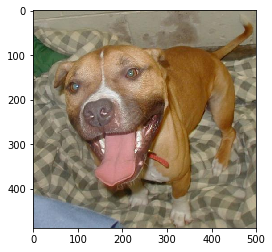

In [9]:
plt.imshow(dog6)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [11]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

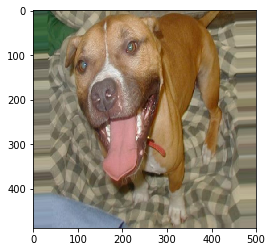

In [12]:
plt.imshow(image_gen.random_transform(dog6))

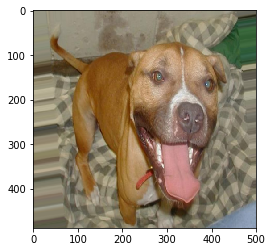

In [13]:
plt.imshow(image_gen.random_transform(dog6))

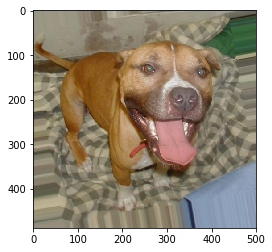

In [14]:
plt.imshow(image_gen.random_transform(dog6))

In [23]:
image_gen.flow_from_directory('/home/moe/Documents/ML/CatAndDog/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [24]:
image_gen.flow_from_directory('/home/moe/Documents/ML/CatAndDog/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [25]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [23]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

### Training the Model

In [26]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('/home/moe/Documents/ML/CatAndDog/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory('/home/moe/Documents/ML/CatAndDog/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [31]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
results = model.fit_generator(train_image_gen,
                              epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 56s 377ms/step - loss: 0.7034 - accuracy: 0.5004 - val_loss: 0.6428 - val_accuracy: 0.5104
Epoch 2/100
150/150 [==============================] - 61s 409ms/step - loss: 0.6911 - accuracy: 0.5179 - val_loss: 0.6532 - val_accuracy: 0.6094
Epoch 3/100
150/150 [==============================] - 68s 456ms/step - loss: 0.6809 - accuracy: 0.5767 - val_loss: 0.7117 - val_accuracy: 0.5833
Epoch 4/100
150/150 [==============================] - 69s 460ms/step - loss: 0.6741 - accuracy: 0.5854 - val_loss: 0.7088 - val_accuracy: 0.6146
Epoch 5/100
150/150 [==============================] - 72s 477ms/step - loss: 0.6721 - accuracy: 0.5900 - val_loss: 0.4721 - val_accuracy: 0.6094
Epoch 6/100
150/150 [==============================] - 70s 466ms/step - loss: 0.6615 - accuracy: 0.6144 - val_loss: 0.6873 - val_accuracy: 0.6354
Epoch 7/100
150/150 [==============================] - 75s 502ms/step - loss: 0.6670 - accuracy: 0.5971 - val_loss: 0.6730 -

Epoch 57/100
150/150 [==============================] - 62s 413ms/step - loss: 0.4942 - accuracy: 0.7717 - val_loss: 0.4737 - val_accuracy: 0.7760
Epoch 58/100
150/150 [==============================] - 60s 403ms/step - loss: 0.4789 - accuracy: 0.7713 - val_loss: 0.5627 - val_accuracy: 0.8021
Epoch 59/100
150/150 [==============================] - 63s 417ms/step - loss: 0.4754 - accuracy: 0.7792 - val_loss: 0.6214 - val_accuracy: 0.8021
Epoch 60/100
150/150 [==============================] - 64s 427ms/step - loss: 0.4822 - accuracy: 0.7733 - val_loss: 0.1950 - val_accuracy: 0.8594
Epoch 61/100
150/150 [==============================] - 60s 399ms/step - loss: 0.4641 - accuracy: 0.7783 - val_loss: 0.3257 - val_accuracy: 0.7604
Epoch 62/100
150/150 [==============================] - 60s 402ms/step - loss: 0.4875 - accuracy: 0.7713 - val_loss: 0.5031 - val_accuracy: 0.8438
Epoch 63/100
150/150 [==============================] - 60s 400ms/step - loss: 0.4672 - accuracy: 0.7779 - val_loss: 0

In [25]:
# model.save('cat_dog2.h5')

# Evaluating the Model

In [35]:
results.history['accuracy']

[0.5004167,
 0.5179167,
 0.57666665,
 0.5854167,
 0.59,
 0.6143873,
 0.59708333,
 0.60791665,
 0.6304167,
 0.6354167,
 0.62666667,
 0.63,
 0.63780844,
 0.645,
 0.6666667,
 0.6404167,
 0.66333336,
 0.65958333,
 0.6725,
 0.67125,
 0.68666667,
 0.68083334,
 0.7,
 0.69719785,
 0.7125,
 0.7133333,
 0.70666665,
 0.71375,
 0.71541667,
 0.7147637,
 0.7104167,
 0.7125,
 0.71666664,
 0.7216667,
 0.70556253,
 0.72,
 0.7316667,
 0.7395833,
 0.75083333,
 0.7377666,
 0.74125,
 0.7608333,
 0.7341667,
 0.74541664,
 0.7375,
 0.7554167,
 0.7416667,
 0.74041665,
 0.74583334,
 0.75458336,
 0.76375,
 0.7554167,
 0.76625,
 0.76708335,
 0.7532413,
 0.7704167,
 0.77166665,
 0.77125,
 0.77916664,
 0.7733333,
 0.77833545,
 0.77125,
 0.77791667,
 0.77916664,
 0.77791667,
 0.7816667,
 0.7783333,
 0.7762442,
 0.7920833,
 0.8,
 0.79791665,
 0.79291666,
 0.7891667,
 0.7783333,
 0.805,
 0.7871184,
 0.7783333,
 0.80875,
 0.8070833,
 0.80375,
 0.8038478,
 0.7870833,
 0.7975,
 0.81625,
 0.8025,
 0.81458336,
 0.795,
 0.8

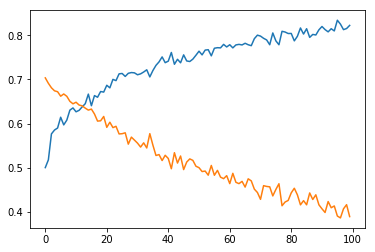

In [37]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])

In [28]:
# model.save('cat_dog_100epochs.h5')

In [18]:
from keras.models import load_model
#save model
model.save('CatDog_model.h5')
# load model
model = load_model('CatDog_model.h5')
# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

# Predicting on new images

In [28]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [29]:
import numpy as np
from keras.preprocessing import image

dog_file = '/home/moe/Documents/ML/CatAndDog/CATS_DOGS/train/DOG/1.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [30]:
prediction_prob = model.predict(dog_img)

In [31]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.98693323]] 


In [32]:
#Try a new pic of a dog
# https://eskipaper.com/images/dogs-9.jpg

dog_file = '/home/moe/Documents/ML/CatAndDog/dogs-9.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

prediction_prob = model.predict(dog_img)
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.99867815]] 


In [33]:
#Try a new pic of a cat
# https://www.telegraph.co.uk/content/dam/news/2017/06/06/TELEMMGLPICT000129549962-xlarge_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQfyf2A9a6I9YchsjMeADBa08.jpeg

cat_file = '/home/moe/Documents/ML/CatAndDog/cat.jpeg'

cat_img = image.load_img(cat_file, target_size=(150, 150))

cat_img = image.img_to_array(cat_img)

cat_img = np.expand_dims(cat_img, axis=0)
cat_img = cat_img/255

prediction_prob = model.predict(cat_img)
print(f'Probability that image is a cat is: {prediction_prob} ')

Probability that image is a cat is: [[0.03113706]] 


# Great Results!